# Cleaning data and the skies

## 📖 Background
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates, and outliers.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

## 💾 The data
The data is a modified dataset from the U.S. Environmental Protection Agency ([EPA](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)). 

#### Ozone contains the daily air quality summary statistics by monitor for the state of California for 2024. Each row contains the date and the air quality metrics per collection method and site
- "Date" - the calendar date with which the air quality values are associated
- "Source" - the data source: EPA's Air Quality System (AQS), or Airnow reports
- "Site ID" - the id for the air monitoring site
- "POC" - the id number for the monitor
- "Daily Max 8-hour Ozone Concentration" - the highest 8-hour value of the day for ozone concentration
- "Units" - parts per million by volume (ppm)
- "Daily AQI Value" - the highest air quality index value for the day, telling how clean or polluted the air is (a value of 50 represents good air quality, while a value above 300 is hazardous)
- "Local Site Name" - name of the monitoring site
- "Daily Obs Count" - number of observations reported in that day
- "Percent Complete" - indicates whether all expected samples were collected
- "Method Code" - identifier for the collection method
- "CBSA Code" - identifier for the core base statistical area (CBSA)
- "CBSA Name" - name of the core base statistical area
- "State FIPS Code" - identifier for the state
- "State" - name of the state
- "County FIPS Code" - identifer for the county
- "County" - name of the county
- "Site Latitude" - latitude coordinates of the site
- "Site Longitude" - longitude coordinates of the side

In [381]:
import pandas as pd
ozone = pd.read_csv('data/ozone.csv')
ozone.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


## 💪 Competition challenge

Create a report that covers the following:
1. Your EDA and data cleaning process.
2. How does daily maximum 8-hour ozone concentration vary over time and regions?
3. Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?
4. Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.
5. Bonus: plot a geospatial heatmap showing any high ozone concentrations.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

# 1. EDA and data cleaning process

In [382]:
# Information about the dataset
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

In [383]:
ozone.head(10)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
5,January 06/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
6,01/07/2024,AQS,60010007,1,0.030,ppm,28.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
7,/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
8,/2024,AQS,60010007,1,0.034,ppm,31.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
9,January 10/2024,AQS,60010007,1,0.036,ppm,33.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [384]:
# Check Source, Site ID, POC, and Local Site Name
for col in ['Source', 'Site ID', 'POC', 'Local Site Name']:
    print(f"{col} unique values: {ozone[col].nunique()}")
    print(ozone[col].unique())
    print()

Source unique values: 2
['AQS' 'AirNow']

Site ID unique values: 162
[60010007 60010009 60010011 60010013 60010016 60012001 60050002 60070008
 60072003 60090001 60111002 60130002 60131002 60131004 60132007 60170012
 60170020 60172004 60190007 60190011 60190242 60190500 60192009 60194001
 60195001 60210003 60231004 60250005 60251003 60254003 60254004 60270002
 60270101 60271023 60290007 60290008 60290014 60290020 60290232 60292012
 60295002 60296001 60311004 60333002 60370016 60370113 60371103 60371201
 60371302 60371602 60371701 60372005 60374009 60374010 60376012 60379035
 60390004 60392010 60410001 60430003 60430006 60450008 60450011 60470003
 60472024 60530002 60530008 60531003 60570005 60590007 60595001 60610003
 60610004 60610006 60611004 60612003 60650009 60650010 60650012 60650016
 60651016 60652007 60655001 60658001 60658005 60659001 60659003 60670006
 60670010 60670011 60670012 60675003 60690002 60690003 60710001 60710005
 60710306 60711234 60712002 60714001 60714003 60719002 

In [385]:
ozone_clean = ozone.copy()
# Only keep the date format MM/DD/YYYY or january DD/YYYY
import re
date_pattern = re.compile(r'^(0[1-9]|1[0-2})/(0[1-9]|[12][0-9]|3[01])/\d{4}$|^(January|February|March|April|May|June|July|August|September|October|November|December) (0[1-9]|[12][0-9]|3[01])/\d{4}$')
ozone_clean = ozone_clean[ozone_clean['Date'].str.match(date_pattern, na=False)]

In [386]:
ozone_clean.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
5,January 06/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
9,January 10/2024,AQS,60010007,1,0.036,ppm,33.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
10,January 11/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
11,January 12/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
26,January 02/2024,AQS,60010009,1,0.033,ppm,31.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935
29,January 05/2024,AQS,60010009,1,0.021,ppm,19.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935
32,January 08/2024,AQS,60010009,1,0.020,ppm,19.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935
42,January 18/2024,AQS,60010009,1,0.015,ppm,14.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935


In [387]:
# Change all date to datetime format
ozone_clean['Date'] = pd.to_datetime(ozone_clean['Date'])

In [388]:
# Check local site name
sorted(ozone_clean['County'].unique())

['Alameda',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'LA',
 'Lake',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Monterey',
 'Nevada',
 'Orange',
 'Placer',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo']

In [389]:
# Change "LA" to "Los Angeles"
ozone_clean['County'] = ozone_clean['County'].replace('LA', 'Los Angeles')

In [390]:
ozone_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9011 entries, 3 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  9011 non-null   datetime64[ns]
 1   Source                                9011 non-null   object        
 2   Site ID                               9011 non-null   int64         
 3   POC                                   9011 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  8545 non-null   float64       
 5   Units                                 9011 non-null   object        
 6   Daily AQI Value                       8560 non-null   float64       
 7   Local Site Name                       9011 non-null   object        
 8   Daily Obs Count                       9011 non-null   int64         
 9   Percent Complete                      9011 non-null   float64       
 10  Meth

In [391]:
ozone_clean.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
5,2024-01-06,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
9,2024-01-10,AQS,60010007,1,0.036,ppm,33.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
10,2024-01-11,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
11,2024-01-12,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
26,2024-01-02,AQS,60010009,1,0.033,ppm,31.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935
29,2024-01-05,AQS,60010009,1,0.021,ppm,19.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935
32,2024-01-08,AQS,60010009,1,0.020,ppm,19.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935
42,2024-01-18,AQS,60010009,1,0.015,ppm,14.0,Oakland,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.743065,-122.169935


In [392]:
# Check for duplicates
duplicates = ozone_clean[ozone_clean.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 17


In [393]:
# Drop duplicates
ozone_clean = ozone_clean.drop_duplicates()

In [394]:
ozone_clean.describe()

,Date,Site ID,POC,Daily Max 8-hour Ozone Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,Method Code,CBSA Code,County FIPS Code,Site Latitude,Site Longitude
count,8994,8.994000e+03,8994.000000,8528.000000,8543.000000,8994.000000,8994.000000,7942.000000,8589.000000,8994.000000,8994.000000,8994.000000
mean,2024-07-02 07:36:37.464976384,6.059095e+07,1.000222,0.043820,45.923329,27.421948,99.374138,88.678167,36136.020491,58.928174,36.150626,-119.654734
min,2024-01-01 00:00:00,6.001001e+07,1.000000,0.000000,0.000000,8.000000,47.000000,47.000000,12540.000000,1.000000,32.578165,-124.179490
25%,2024-04-05 00:00:00,6.031100e+07,1.000000,0.034000,31.000000,17.000000,100.000000,87.000000,31080.000000,31.000000,34.181977,-121.420838
50%,2024-07-04 00:00:00,6.065800e+07,1.000000,0.041000,39.000000,17.000000,100.000000,87.000000,40140.000000,65.000000,36.209286,-119.791460
75%,2024-09-30 00:00:00,6.081100e+07,1.000000,0.052000,48.000000,17.000000,100.000000,87.000000,41860.000000,81.000000,37.961578,-117.952640
max,2024-12-31 00:00:00,6.113100e+07,2.000000,0.116000,209.000000,1000.000000,100.000000,199.000000,49700.000000,113.000000,41.726892,-114.602090
std,NaN,3.011287e+05,0.014911,0.014841,26.571085,97.261901,3.518691,35.972371,9568.885931,30.108676,2.186630,2.027250


In [395]:
ozone_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8994 entries, 3 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  8994 non-null   datetime64[ns]
 1   Source                                8994 non-null   object        
 2   Site ID                               8994 non-null   int64         
 3   POC                                   8994 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  8528 non-null   float64       
 5   Units                                 8994 non-null   object        
 6   Daily AQI Value                       8543 non-null   float64       
 7   Local Site Name                       8994 non-null   object        
 8   Daily Obs Count                       8994 non-null   int64         
 9   Percent Complete                      8994 non-null   float64       
 10  Meth

In [396]:
# List of categorical columns
categorical_cols = ['Source', 'Site ID', 'POC', 'Units', 'Local Site Name', 'Method Code', 'CBSA Code', 'CBSA Name', 'County FIPS Code', 'County']
# Check unique values in categorical columns
for col in categorical_cols:
    print(f"{col} unique values: {ozone_clean[col].nunique()}")
    print(ozone_clean[col].unique())

Source unique values: 2
['AQS' 'AirNow']
Site ID unique values: 161
[60010007 60010009 60010011 60010013 60010016 60012001 60050002 60070008
 60072003 60090001 60111002 60130002 60131002 60131004 60132007 60170012
 60170020 60172004 60190007 60190011 60190242 60190500 60192009 60194001
 60195001 60210003 60231004 60250005 60251003 60254003 60254004 60270002
 60270101 60271023 60290007 60290008 60290014 60290020 60290232 60292012
 60295002 60296001 60311004 60333002 60370016 60370113 60371103 60371201
 60371302 60371602 60371701 60372005 60374009 60374010 60376012 60379035
 60390004 60392010 60410001 60430003 60430006 60450008 60450011 60472024
 60530002 60530008 60531003 60570005 60590007 60595001 60610003 60610004
 60610006 60611004 60612003 60650009 60650010 60650012 60650016 60651016
 60652007 60655001 60658001 60658005 60659001 60659003 60670006 60670010
 60670011 60670012 60675003 60690002 60690003 60710001 60710005 60710306
 60711234 60712002 60714001 60714003 60719002 60719004 6

In [397]:
# List of numerical columns
numerical_cols = ['Daily Max 8-hour Ozone Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'Site Latitude', 'Site Longitude']
# Check for missing values in numerical columns
ozone_clean[numerical_cols].isnull().sum()

Daily Max 8-hour Ozone Concentration    466
Daily AQI Value                         451
Daily Obs Count                           0
Percent Complete                          0
Site Latitude                             0
Site Longitude                            0
dtype: int64

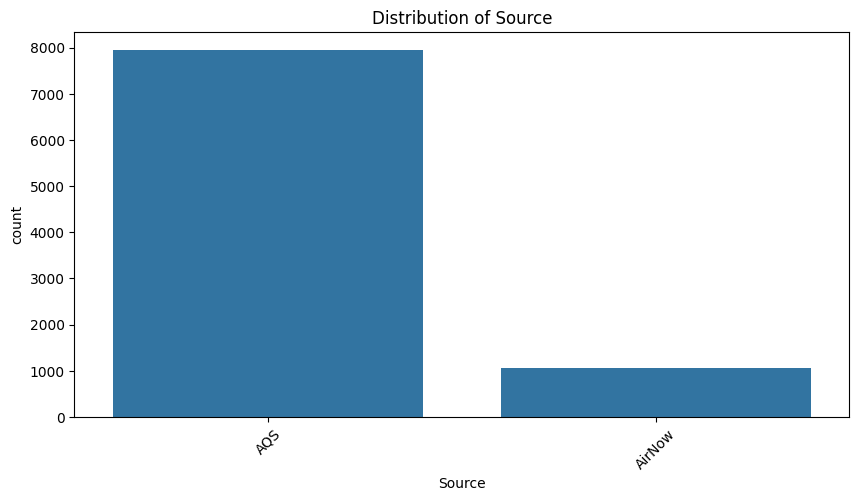

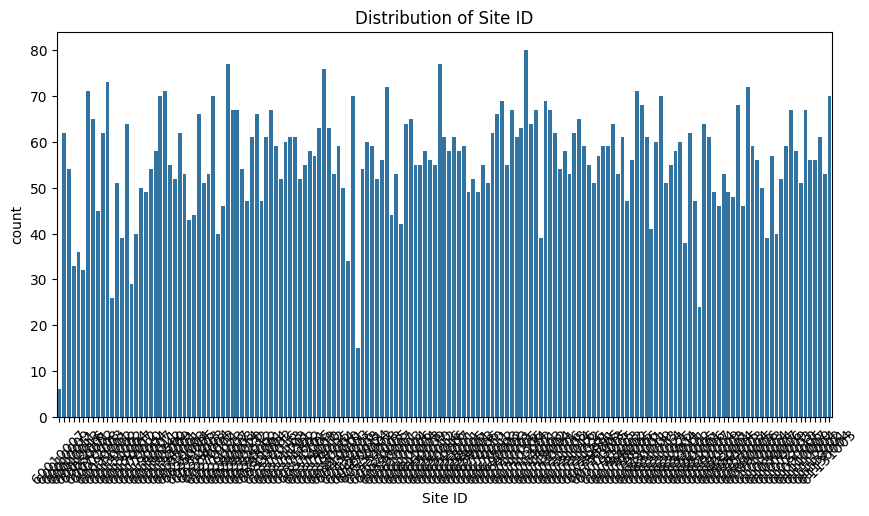

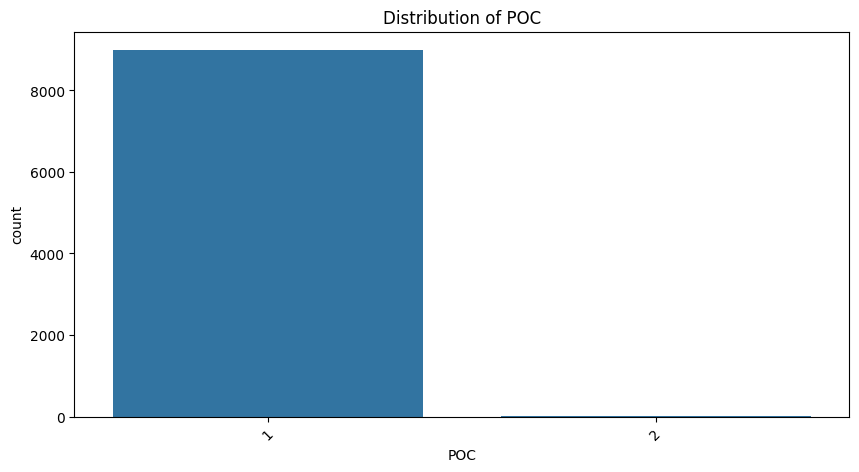

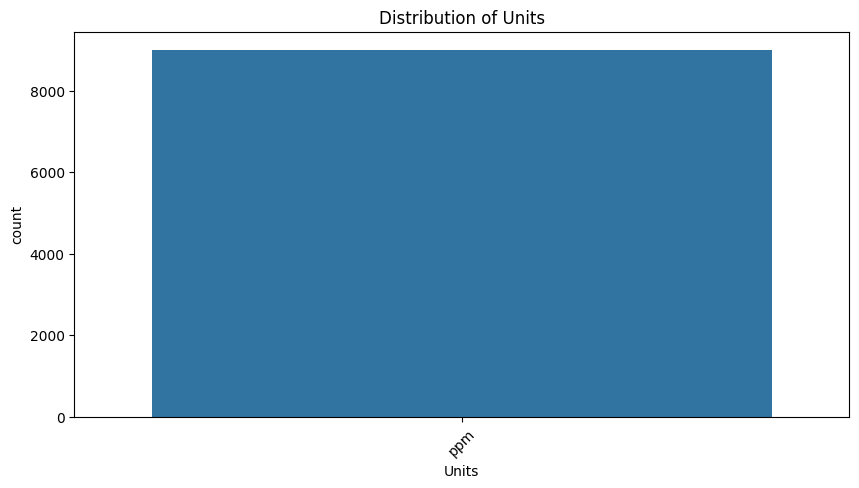

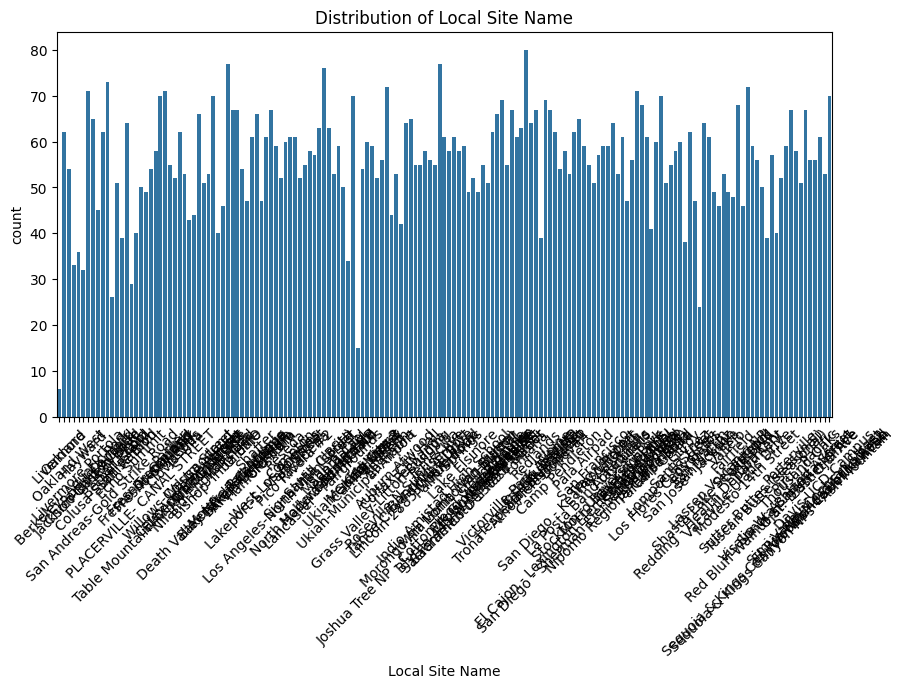

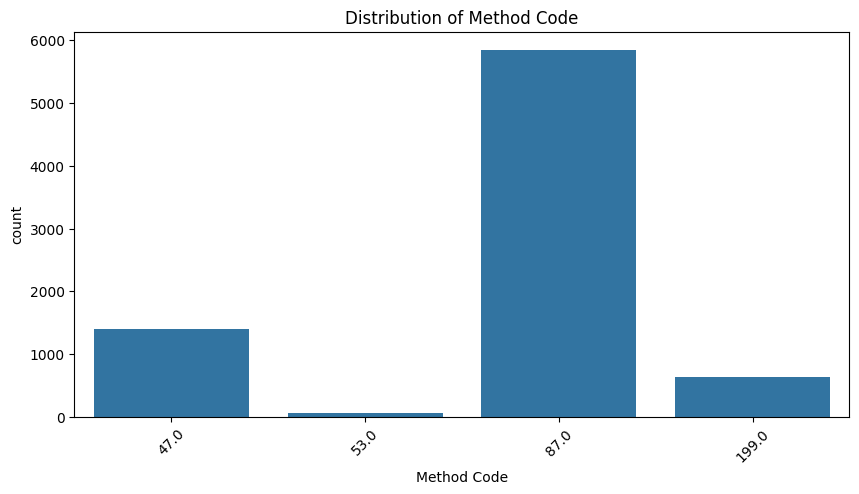

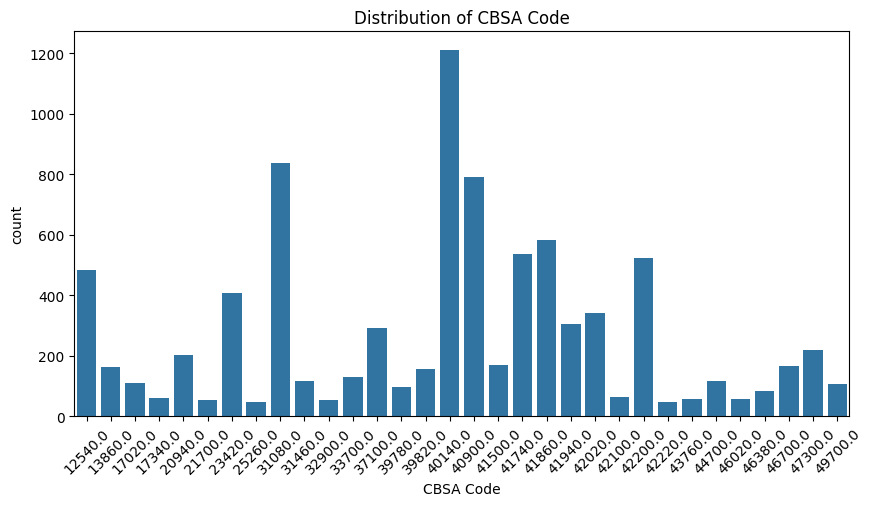

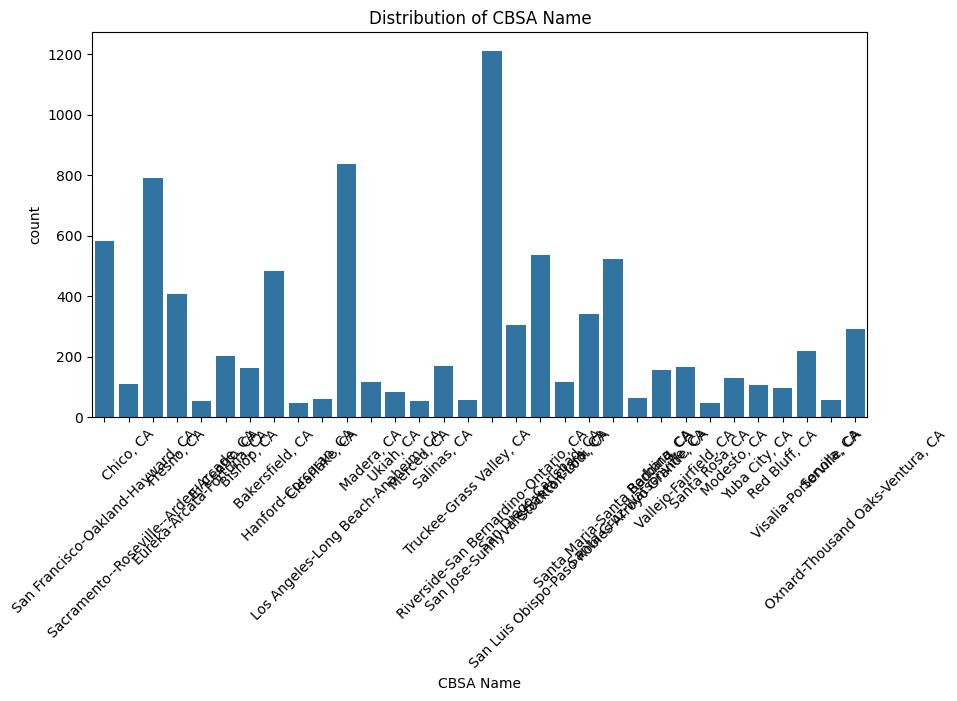

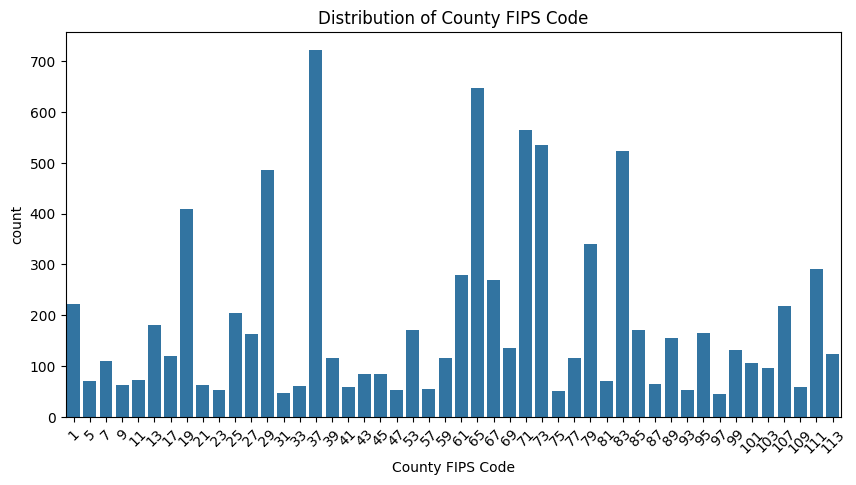

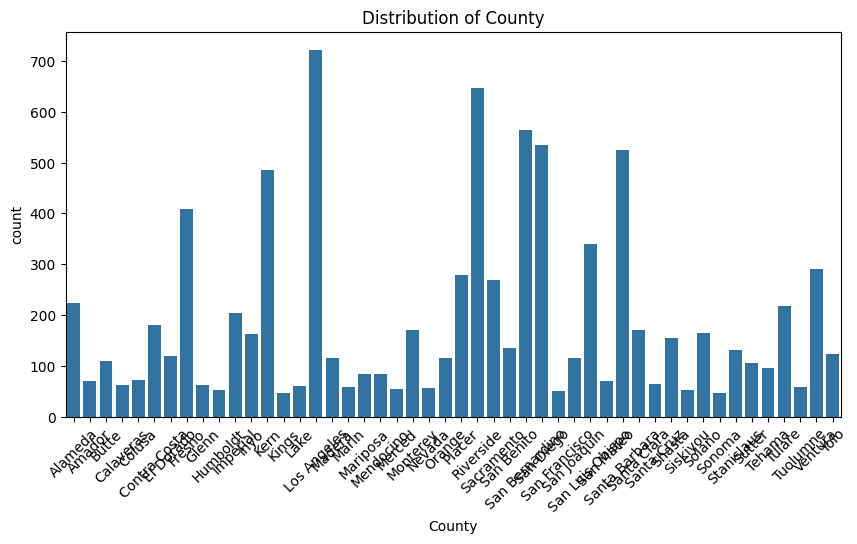

In [398]:
# Visualize categorical columns
import matplotlib.pyplot as plt
import seaborn as sns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=ozone_clean, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

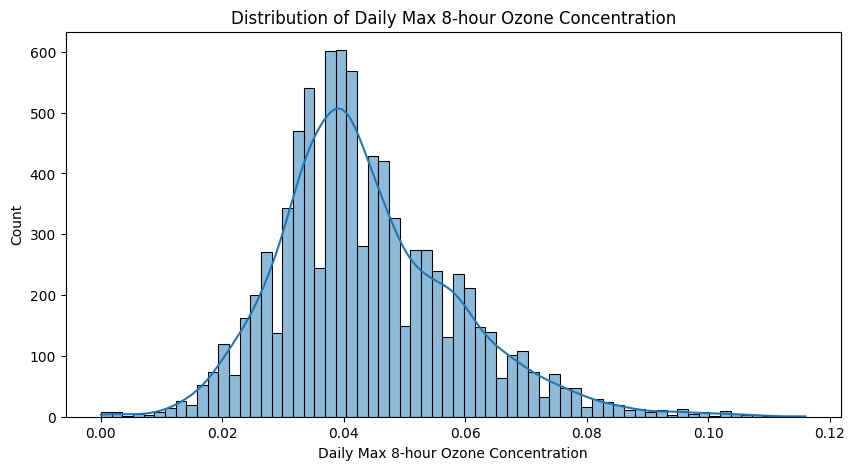

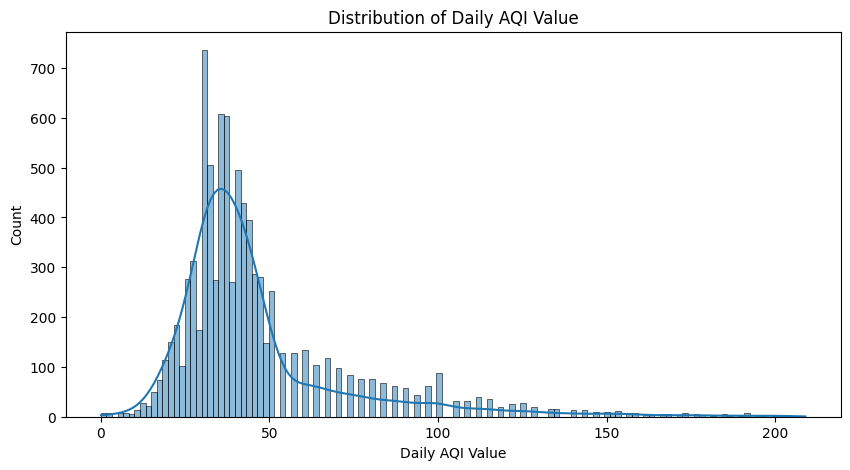

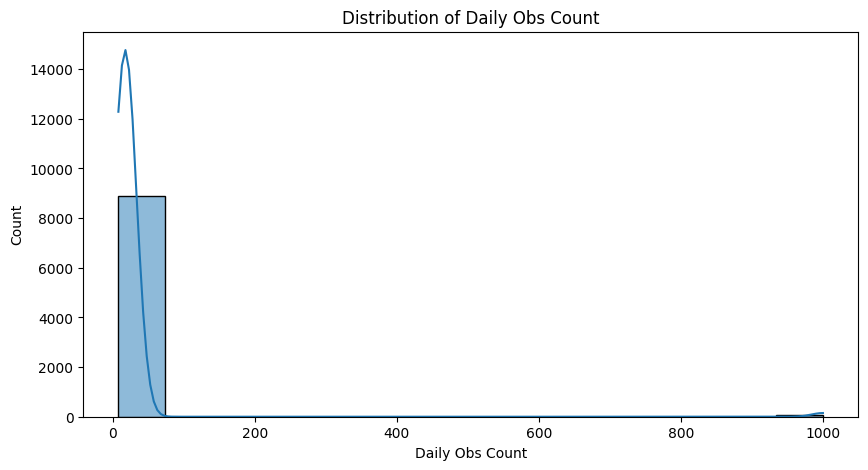

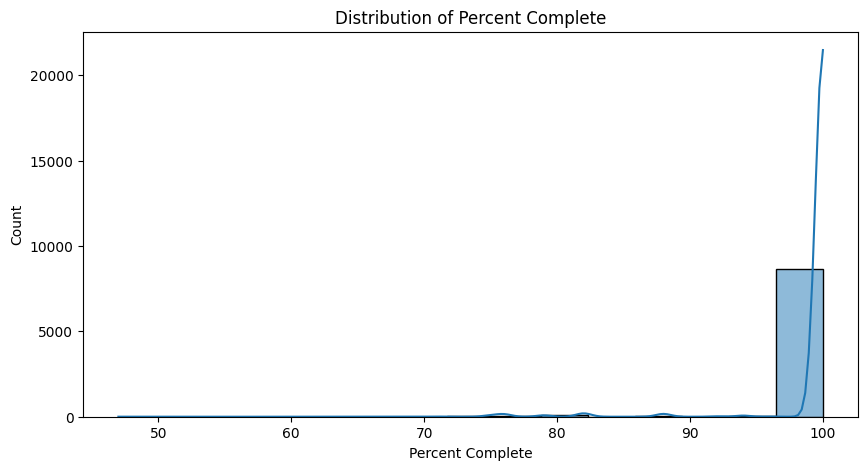

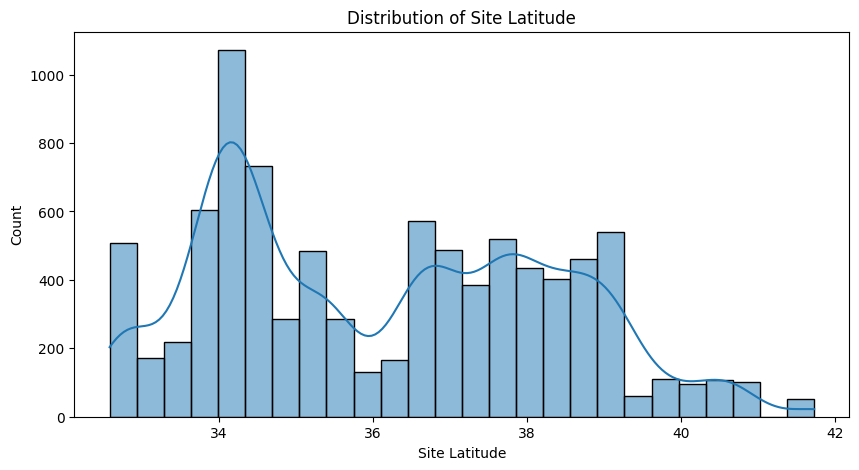

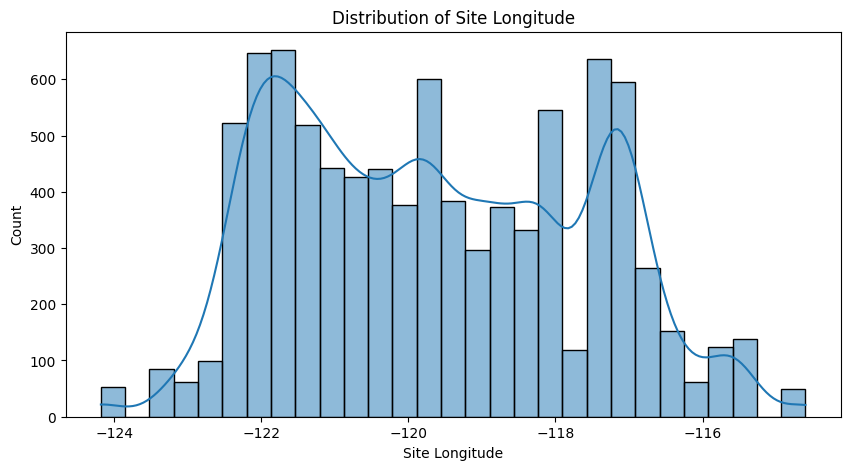

In [399]:
# Visualize numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(ozone_clean[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [400]:
# Check the info of Daily observations count
ozone_clean['Daily Obs Count'].describe()

count    8994.000000
mean       27.421948
std        97.261901
min         8.000000
25%        17.000000
50%        17.000000
75%        17.000000
max      1000.000000
Name: Daily Obs Count, dtype: float64

# For more accurate analysis, filter out rows where Daily Obs Count is less than 18
ozone_clean = ozone_clean[ozone_clean['Daily Obs Count'] >= 18]

In [401]:
ozone_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8994 entries, 3 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  8994 non-null   datetime64[ns]
 1   Source                                8994 non-null   object        
 2   Site ID                               8994 non-null   int64         
 3   POC                                   8994 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  8528 non-null   float64       
 5   Units                                 8994 non-null   object        
 6   Daily AQI Value                       8543 non-null   float64       
 7   Local Site Name                       8994 non-null   object        
 8   Daily Obs Count                       8994 non-null   int64         
 9   Percent Complete                      8994 non-null   float64       
 10  Meth

In [402]:
# We only need 100% complete data for accurate analysis
ozone_clean = ozone_clean[ozone_clean['Percent Complete'] == 100]

In [403]:
ozone_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 3 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  8676 non-null   datetime64[ns]
 1   Source                                8676 non-null   object        
 2   Site ID                               8676 non-null   int64         
 3   POC                                   8676 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  8225 non-null   float64       
 5   Units                                 8676 non-null   object        
 6   Daily AQI Value                       8239 non-null   float64       
 7   Local Site Name                       8676 non-null   object        
 8   Daily Obs Count                       8676 non-null   int64         
 9   Percent Complete                      8676 non-null   float64       
 10  Meth

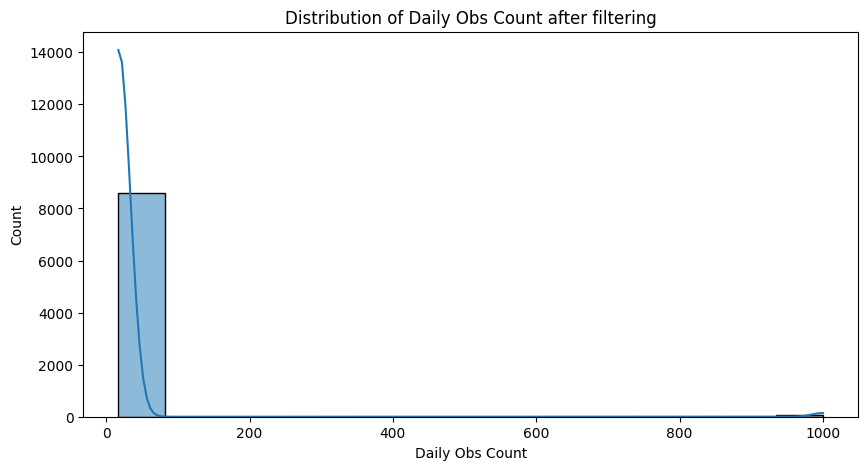

In [404]:
# Visualize the observations count after filtering
plt.figure(figsize=(10, 5))
sns.histplot(ozone_clean['Daily Obs Count'], kde=True)
plt.title('Distribution of Daily Obs Count after filtering')
plt.show()

In [405]:
# For the challenge, we will focus on the following columns and create a new dataframe
ozone_relevant = ozone_clean[['Date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour Ozone Concentration', 'Daily AQI Value', 'Local Site Name', 'CBSA Code', 'CBSA Name', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude']]
ozone_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 3 to 54758
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  8676 non-null   datetime64[ns]
 1   Source                                8676 non-null   object        
 2   Site ID                               8676 non-null   int64         
 3   POC                                   8676 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  8225 non-null   float64       
 5   Daily AQI Value                       8239 non-null   float64       
 6   Local Site Name                       8676 non-null   object        
 7   CBSA Code                             8279 non-null   float64       
 8   CBSA Name                             8279 non-null   object        
 9   County FIPS Code                      8676 non-null   int64         
 10  Coun

In [406]:
# Check for duplicates in 3 dataframes
duplicates = ozone_relevant[ozone_relevant.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 1


In [407]:
ozone_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 3 to 54758
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  8676 non-null   datetime64[ns]
 1   Source                                8676 non-null   object        
 2   Site ID                               8676 non-null   int64         
 3   POC                                   8676 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  8225 non-null   float64       
 5   Daily AQI Value                       8239 non-null   float64       
 6   Local Site Name                       8676 non-null   object        
 7   CBSA Code                             8279 non-null   float64       
 8   CBSA Name                             8279 non-null   object        
 9   County FIPS Code                      8676 non-null   int64         
 10  Coun

# Fill missing values in 'Daily Max 8-hour Ozone Concentration' and 'Daily AQI Value' with the number of same day and same site mean
ozone_relevant.loc[:, 'Daily Max 8-hour Ozone Concentration'] = ozone_relevant.groupby(['Date', 'Site ID'])['Daily Max 8-hour Ozone Concentration'].transform(lambda x: x.fillna(x.mean()))
ozone_relevant.loc[:, 'Daily AQI Value'] = ozone_relevant.groupby(['Date', 'Site ID'])['Daily AQI Value'].transform(lambda x: x.fillna(x.mean()))

In [408]:
ozone_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 3 to 54758
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  8676 non-null   datetime64[ns]
 1   Source                                8676 non-null   object        
 2   Site ID                               8676 non-null   int64         
 3   POC                                   8676 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  8225 non-null   float64       
 5   Daily AQI Value                       8239 non-null   float64       
 6   Local Site Name                       8676 non-null   object        
 7   CBSA Code                             8279 non-null   float64       
 8   CBSA Name                             8279 non-null   object        
 9   County FIPS Code                      8676 non-null   int64         
 10  Coun

In [409]:
# Drop rows with any remaining missing values
ozone_relevant = ozone_relevant.dropna(subset=['Daily AQI Value', 'Daily Max 8-hour Ozone Concentration'])

In [410]:
ozone_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7806 entries, 3 to 54755
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  7806 non-null   datetime64[ns]
 1   Source                                7806 non-null   object        
 2   Site ID                               7806 non-null   int64         
 3   POC                                   7806 non-null   int64         
 4   Daily Max 8-hour Ozone Concentration  7806 non-null   float64       
 5   Daily AQI Value                       7806 non-null   float64       
 6   Local Site Name                       7806 non-null   object        
 7   CBSA Code                             7441 non-null   float64       
 8   CBSA Name                             7441 non-null   object        
 9   County FIPS Code                      7806 non-null   int64         
 10  Coun

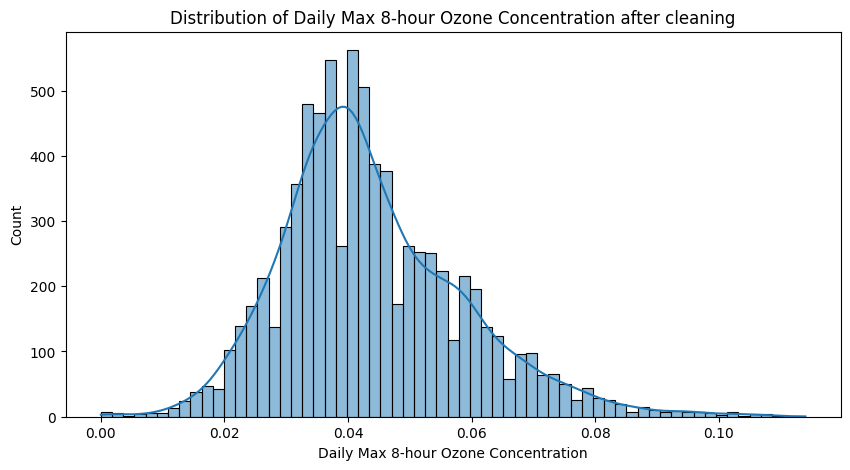

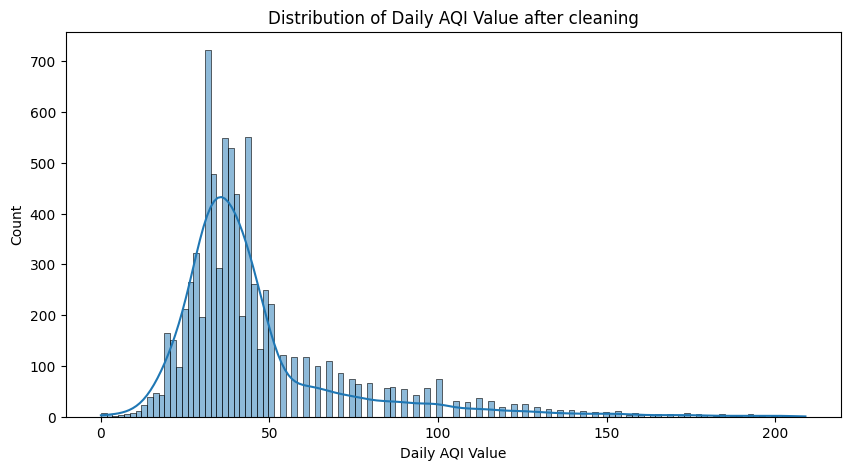

In [411]:
# Visualize the cleaned numerical columns
for col in ['Daily Max 8-hour Ozone Concentration', 'Daily AQI Value']:
    plt.figure(figsize=(10, 5))
    sns.histplot(ozone_relevant[col], kde=True)
    plt.title(f'Distribution of {col} after cleaning')
    plt.show()

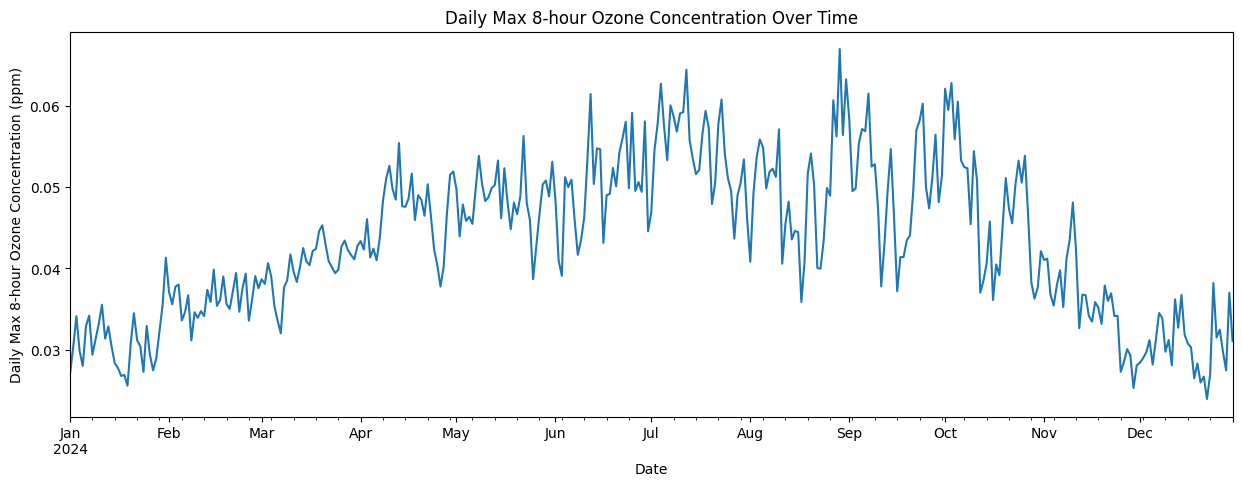

In [412]:
# Challenge 2: How does daily maximum 8-hour ozone concentration vary over time and regions?
ozone_relevant.groupby(['Date'])['Daily Max 8-hour Ozone Concentration'].mean().plot(figsize=(15, 5), title='Daily Max 8-hour Ozone Concentration Over Time')
plt.ylabel('Daily Max 8-hour Ozone Concentration (ppm)')
plt.xlabel('Date')
plt.show()

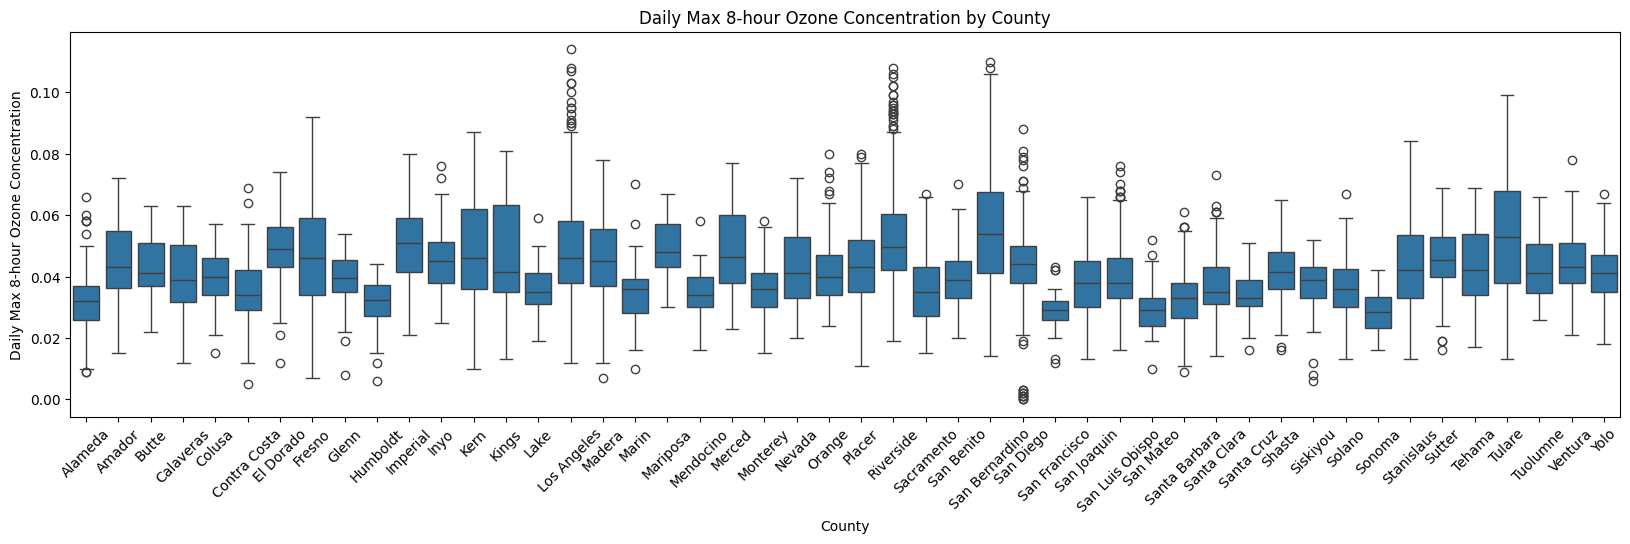

In [413]:
# How does daily maximum 8-hour ozone concentration vary over regions?
plt.figure(figsize=(20, 5))
sns.boxplot(data=ozone_relevant, x='County', y='Daily Max 8-hour Ozone Concentration')
plt.title('Daily Max 8-hour Ozone Concentration by County')
plt.xticks(rotation=45)
plt.show()

In [414]:
# Challenge 3: Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?
# Identify high ozone concentration areas
high_ozone_areas = ozone_relevant[ozone_relevant['Daily Max 8-hour Ozone Concentration'] > ozone_relevant['Daily Max 8-hour Ozone Concentration'].quantile(0.9)]
high_ozone_counts = high_ozone_areas['County'].value_counts()
print("Counties with consistently high ozone concentrations:")
print(high_ozone_counts)

Counties with consistently high ozone concentrations:
County
San Bernardino     147
Riverside          106
Los Angeles         99
Kern                86
Fresno              63
Tulare              59
Imperial            18
San Diego           18
Placer              17
Stanislaus          17
San Luis Obispo     12
Kings               10
Madera               8
El Dorado            7
Tehama               6
Merced               6
Inyo                 6
Orange               5
Sutter               5
Nevada               4
Ventura              4
Amador               3
Sacramento           2
Mariposa             2
Tuolumne             2
Shasta               2
Alameda              1
Solano               1
Santa Clara          1
San Joaquin          1
San Benito           1
Marin                1
Contra Costa         1
Yolo                 1
Name: count, dtype: int64


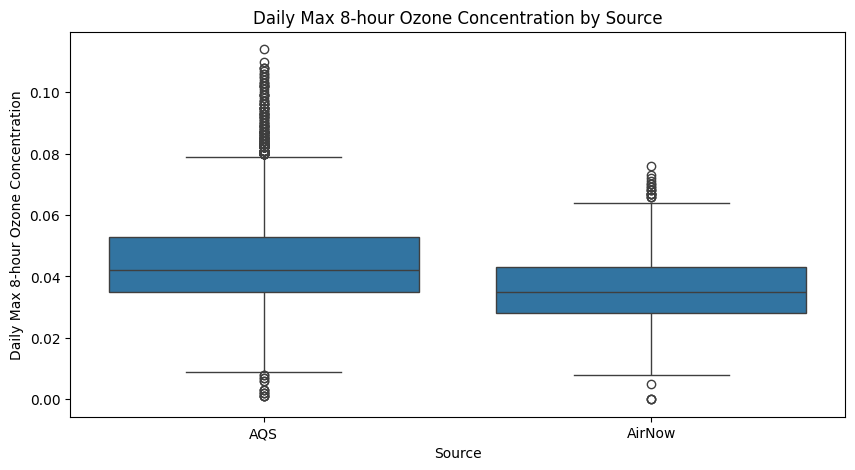

In [415]:
# Compare ozone levels by Source
plt.figure(figsize=(10, 5))
sns.boxplot(data=ozone_relevant, x='Source', y='Daily Max 8-hour Ozone Concentration')
plt.title('Daily Max 8-hour Ozone Concentration by Source')
plt.show()

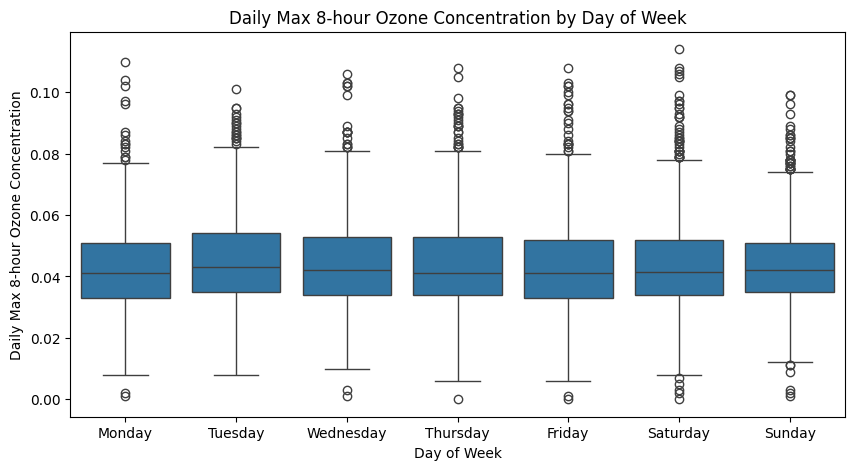

In [416]:
# Challenge 4: Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.
ozone_relevant['Day of Week'] = ozone_relevant['Date'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.boxplot(data=ozone_relevant, x='Day of Week', y='Daily Max 8-hour Ozone Concentration', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Max 8-hour Ozone Concentration by Day of Week')
plt.show()

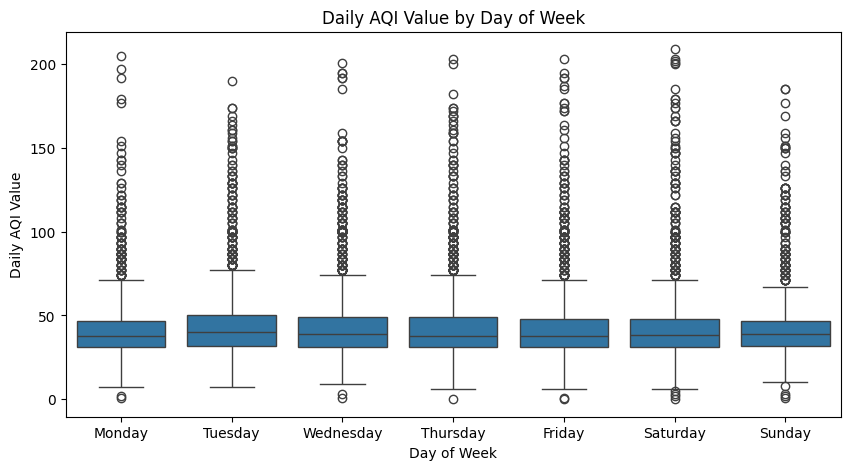

In [418]:
# AQI by Day of Week
plt.figure(figsize=(10, 5))
sns.boxplot(data=ozone_relevant, x='Day of Week', y='Daily AQI Value', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily AQI Value by Day of Week')
plt.show()

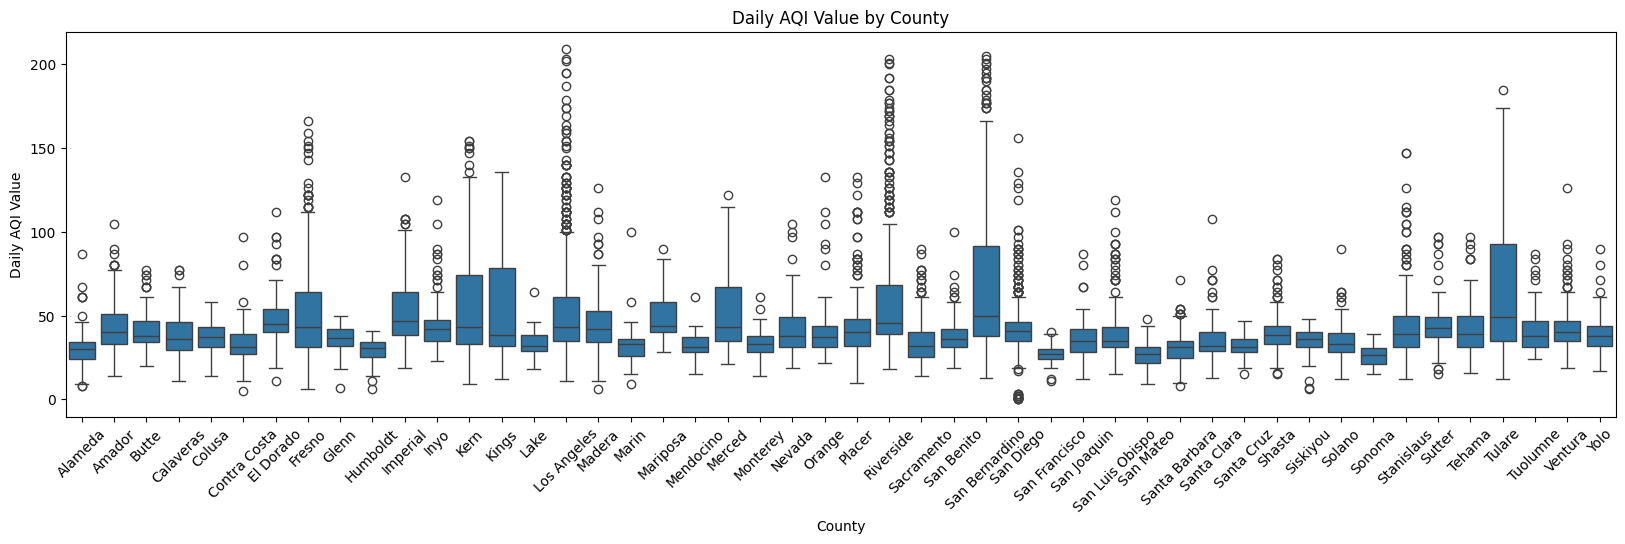

In [419]:
# AQI over counties
plt.figure(figsize=(20, 5))
sns.boxplot(data=ozone_relevant, x='County', y='Daily AQI Value')
plt.title('Daily AQI Value by County')
plt.xticks(rotation=45)
plt.show()

In [423]:
# Which counties have mean AQI > 50?
mean_aqi_by_county = ozone_relevant.groupby('County')['Daily AQI Value'].mean()
high_aqi_counties = mean_aqi_by_county[mean_aqi_by_county > 50]
print("Counties with mean AQI > 50:")
print(high_aqi_counties)

Counties with mean AQI > 50:
County
Fresno            51.517808
Imperial          53.787097
Kern              55.414918
Kings             52.421053
Los Angeles       54.426810
Merced            51.708333
Riverside         60.659574
San Bernardino    69.774530
Tulare            66.129534
Name: Daily AQI Value, dtype: float64
